In [14]:
#importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [15]:
#Assigning the csv path to a variable
csv_path = r"//home//mo//Documents//UNC//project1//Project1-Group//Boston2020.csv"

#useing pandas to read the file
df_read = pd.read_csv(csv_path, low_memory=False )

#Cleaning the owner-occupied cloumn
df_clean = df_read[(df_read["OWN_OCC"] == "Y") & (df_read["R_BDRMS"] <= 7) & (df_read["R_BDRMS"] != 0) & (df_read["AV_TOTAL"] < 6000000)]

df_clean = df_clean[["AV_TOTAL", "LIVING_AREA", "R_BDRMS", "ZIPCODE","OWN_OCC", "STRUCTURE_CLASS" , "YR_BUILT","R_BLDG_STYL"]]

df_clean



,AV_TOTAL,LIVING_AREA,R_BDRMS,ZIPCODE,OWN_OCC,STRUCTURE_CLASS,YR_BUILT,R_BLDG_STYL
0,365100,1160,2.0,2128,Y,NaN,1925.0,CP - Cape
1,308300,925,2.0,2128,Y,NaN,1925.0,CL - Colonial
2,275100,1035,3.0,2128,Y,NaN,1910.0,CP - Cape
3,280400,928,3.0,2128,Y,NaN,1915.0,CP - Cape
5,381700,1241,2.0,2128,Y,NaN,1905.0,CP - Cape
...,...,...,...,...,...,...,...,...
30519,631600,1562,3.0,2135,Y,NaN,1920.0,CL - Colonial
30520,683500,1612,4.0,2135,Y,NaN,1920.0,CL - Colonial
30521,886500,2302,4.0,2135,Y,NaN,1910.0,SD - Semi-Det
30522,719600,2347,4.0,2135,Y,NaN,1920.0,SD - Semi-Det


In [16]:
bins = [1800 ,1850 , 1900 , 1950 , 2000 , 2050]
labels = [ "1800-1850", "1850-1900", "1900-1950", "1950-2000", "2000-2050"]
df_clean["YR_BUILT_BINNED"] = pd.cut(df_clean["YR_BUILT"], bins=bins, labels=labels)
df_1800_1850 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1800-1850")[["YR_BUILT_BINNED", "AV_TOTAL" , "LIVING_AREA"]]
df_1850_1900 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1850-1900")[["YR_BUILT_BINNED", "AV_TOTAL", "LIVING_AREA"]]
df_1900_1950 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1900-1950")[["YR_BUILT_BINNED", "AV_TOTAL", "LIVING_AREA"]]
df_1950_2000 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1950-2000")[["YR_BUILT_BINNED", "AV_TOTAL", "LIVING_AREA"]]
df_2000_2050 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("2000-2050")[["YR_BUILT_BINNED", "AV_TOTAL","LIVING_AREA"]]

# Print the resulting DataFrames
print(df_1800_1850)
print(df_1850_1900)
print(df_1900_1950)
print(df_1950_2000)
print(df_2000_2050)

      YR_BUILT_BINNED  AV_TOTAL  LIVING_AREA
46          1800-1850    383200         1645
735         1800-1850    498700         2043
736         1800-1850    648300         2298
825         1800-1850    612300         2054
969         1800-1850    879200         2054
...               ...       ...          ...
28607       1800-1850    432600         1237
29009       1800-1850    536900         1503
29306       1800-1850    663900         2296
30316       1800-1850    726600         2008
30454       1800-1850    531600         1500

[304 rows x 3 columns]
      YR_BUILT_BINNED  AV_TOTAL  LIVING_AREA
7           1850-1900    386600         1573
9           1850-1900    356200         1224
10          1850-1900    420500         1118
11          1850-1900    401100         1174
12          1850-1900    380800         1613
...               ...       ...          ...
30443       1850-1900    487400         1490
30452       1850-1900    737500         1786
30455       1850-1900    498300

In [17]:
#im not able to show year range on the statstics below, showing which year range is best to buy in which is 1900 - 1950
df_1800_1850_count= df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1800-1850")[["YR_BUILT_BINNED"]].count()
df_1850_1900_count = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1850-1900")[["LIVING_AREA"]].count()
df_1900_1950_count = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1900-1950")[["LIVING_AREA"]].count()
df_1950_2000_count = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1950-2000")[["LIVING_AREA"]].count()
df_2000_2050_count = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("2000-2050")[["LIVING_AREA"]].count()

print(df_1800_1850_count)
print(df_1850_1900_count)
print(df_1900_1950_count)
print(df_1950_2000_count)
print(df_2000_2050_count)


YR_BUILT_BINNED    304
dtype: int64
LIVING_AREA    6308
dtype: int64
LIVING_AREA    12397
dtype: int64
LIVING_AREA    5338
dtype: int64
LIVING_AREA    1003
dtype: int64


In [18]:
#calculating the average property value
df_clean["AV_TOTAL"].mean().round(2)

598304.16

In [19]:
zipcode_group = df_clean.groupby("ZIPCODE")[["AV_TOTAL" , "LIVING_AREA"]].mean().round(2)

zipcode_group.sort_values(["AV_TOTAL"])

zipcode_group


,AV_TOTAL,LIVING_AREA
ZIPCODE,,
2026,492420.00,1451.40
2108,3818098.33,3240.87
2109,1615500.00,2252.00
2111,665833.33,1913.67
2113,1176650.00,1939.69
2114,2569956.21,2517.02
2115,2945606.06,3398.48
2116,2631079.89,2721.19
2118,2660947.37,2968.57


In [20]:
zipcode_group["price_per_sqft"] = zipcode_group['AV_TOTAL'] / zipcode_group['LIVING_AREA']
zipcode_group["# Houses per zip code"] = df_clean.groupby("ZIPCODE")[["AV_TOTAL" ]].count().round(2)
zipcode_group.sort_values('# Houses per zip code' , ascending=False)

,AV_TOTAL,LIVING_AREA,price_per_sqft,# Houses per zip code
ZIPCODE,,,,
2132,560894.81,1694.51,331.007082,5856
2136,397217.95,1509.73,263.105290,4061
2131,506446.08,1589.38,318.643798,2971
2124,466487.14,1901.90,245.274273,2394
2130,852716.98,2037.50,418.511401,1670
2126,369529.12,1520.12,243.092072,1368
2127,705639.69,1629.26,433.104409,960
2129,987425.79,1836.17,537.763818,919
2135,637743.80,1732.40,368.127338,879


In [21]:
per_sqft_data = zipcode_group[["price_per_sqft" , "# Houses per zip code"]]
per_sqft_data.sort_values("price_per_sqft")

,price_per_sqft,# Houses per zip code
ZIPCODE,,
2186,101.566580,1
2445,111.711712,1
2121,166.910487,291
2119,198.966222,580
2126,243.092072,1368
2125,244.399116,724
2124,245.274273,2394
2136,263.105290,4061
2128,281.055386,734


In [22]:
#grouping the house value and size by the zipcodes to decide 
zipcode_group_count= df_clean.groupby("ZIPCODE")[["AV_TOTAL" ]].count()

zipcode_group_count.sort_values(["AV_TOTAL"] , ascending=False)

,AV_TOTAL
ZIPCODE,
2132,5856
2136,4061
2131,2971
2124,2394
2130,1670
2126,1368
2127,960
2129,919
2135,879


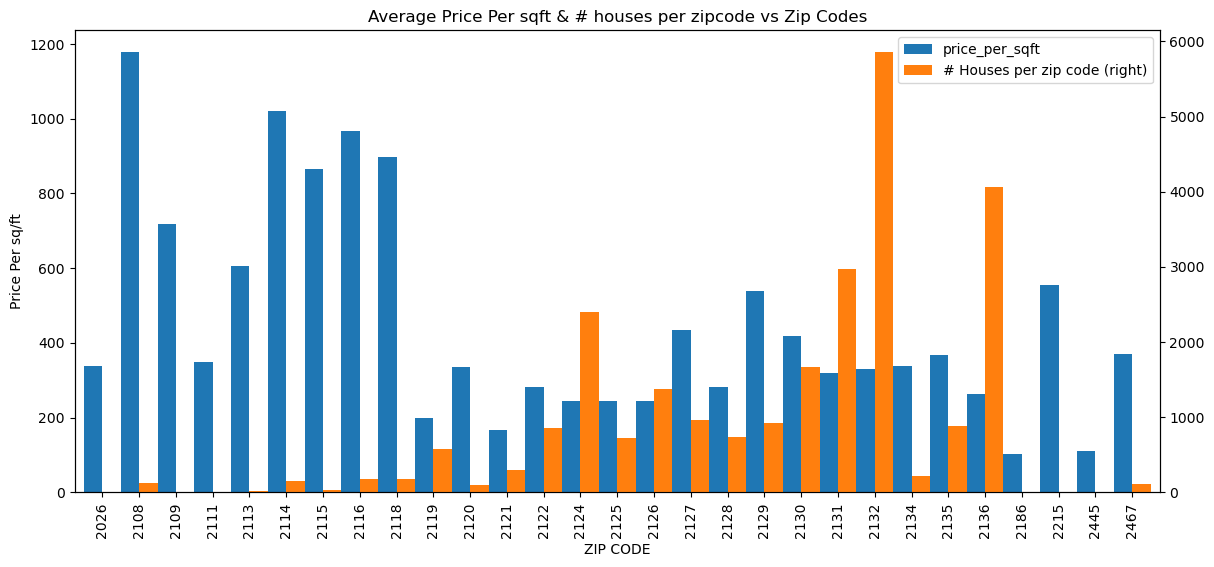

In [23]:
# plotting average price per sqft and count # houses sold in each zip code with zip code 
zip_fig = per_sqft_data.plot( kind= "bar" , secondary_y= "# Houses per zip code" ,rot= 90 , width = 1 , align='center',figsize=(14, 6) )
zip_fig.set_xlabel('ZIP CODE')
zip_fig.set_ylabel('Price Per sq/ft')
#zip_fig.set_ylim(0, 1500)
zip_fig.set_title('Average Price Per sqft & # houses per zipcode vs Zip Codes')


plt.show()

In [24]:
#grouping number of bedrooms 
count_num_bdrms = df_clean.groupby("R_BDRMS")["AV_TOTAL"].count()
count_num_bdrms.head()


R_BDRMS
1.0      139
2.0     3131
3.0    12932
4.0     6470
5.0     1915
Name: AV_TOTAL, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

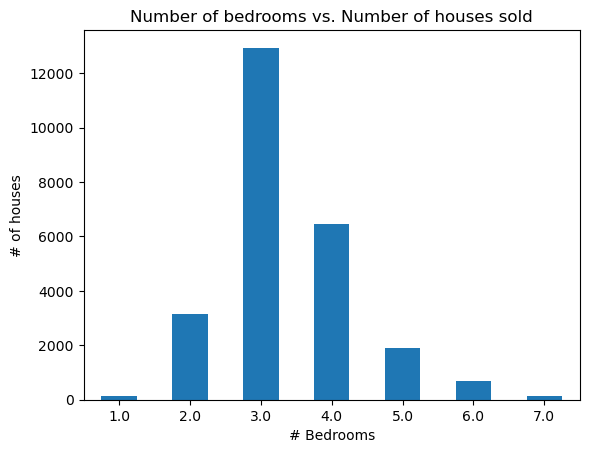

In [25]:
#plotting number of bedrooms vs amount of houses sold
bed_fig =count_num_bdrms.plot(kind="bar" , rot=0)
bed_fig.set_xlabel("# Bedrooms")
bed_fig.set_ylabel("# of houses")
bed_fig.set_title("Number of bedrooms vs. Number of houses sold")
plt.show

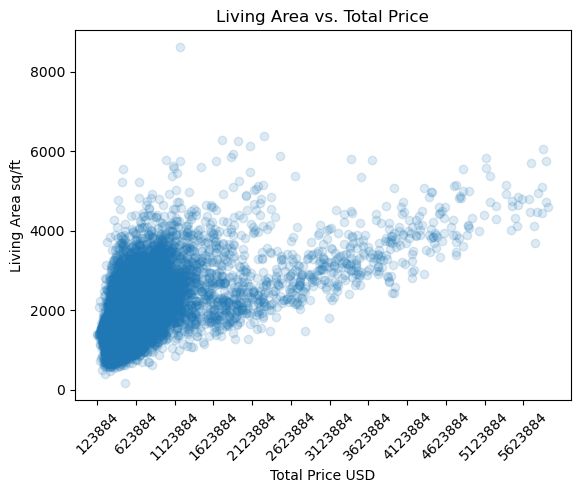

In [26]:
#Assiging variables 
house_value = df_clean["AV_TOTAL"]
living_area = df_clean["LIVING_AREA"]

#using seaborn to generate a scatter plot with alpha option to show the dense section of the plot
areaVsPrice = sns.regplot(x=house_value , y=living_area,scatter_kws={'alpha':0.15}, fit_reg= False)

#sitting labels
areaVsPrice.set(xlabel= "Total Price USD", ylabel="Living Area sq/ft")

#defining the start and end in the x-axis by using the min and max
areaVsPrice.set_xticks(np.arange(int(house_value.min()), int(house_value.max()), 500000))
areaVsPrice.set_xticklabels(np.arange(int(house_value.min() - 1000), int(house_value.max()), 500000), rotation=45)

#setting the title
areaVsPrice.set_title("Living Area vs. Total Price")


plt.show()


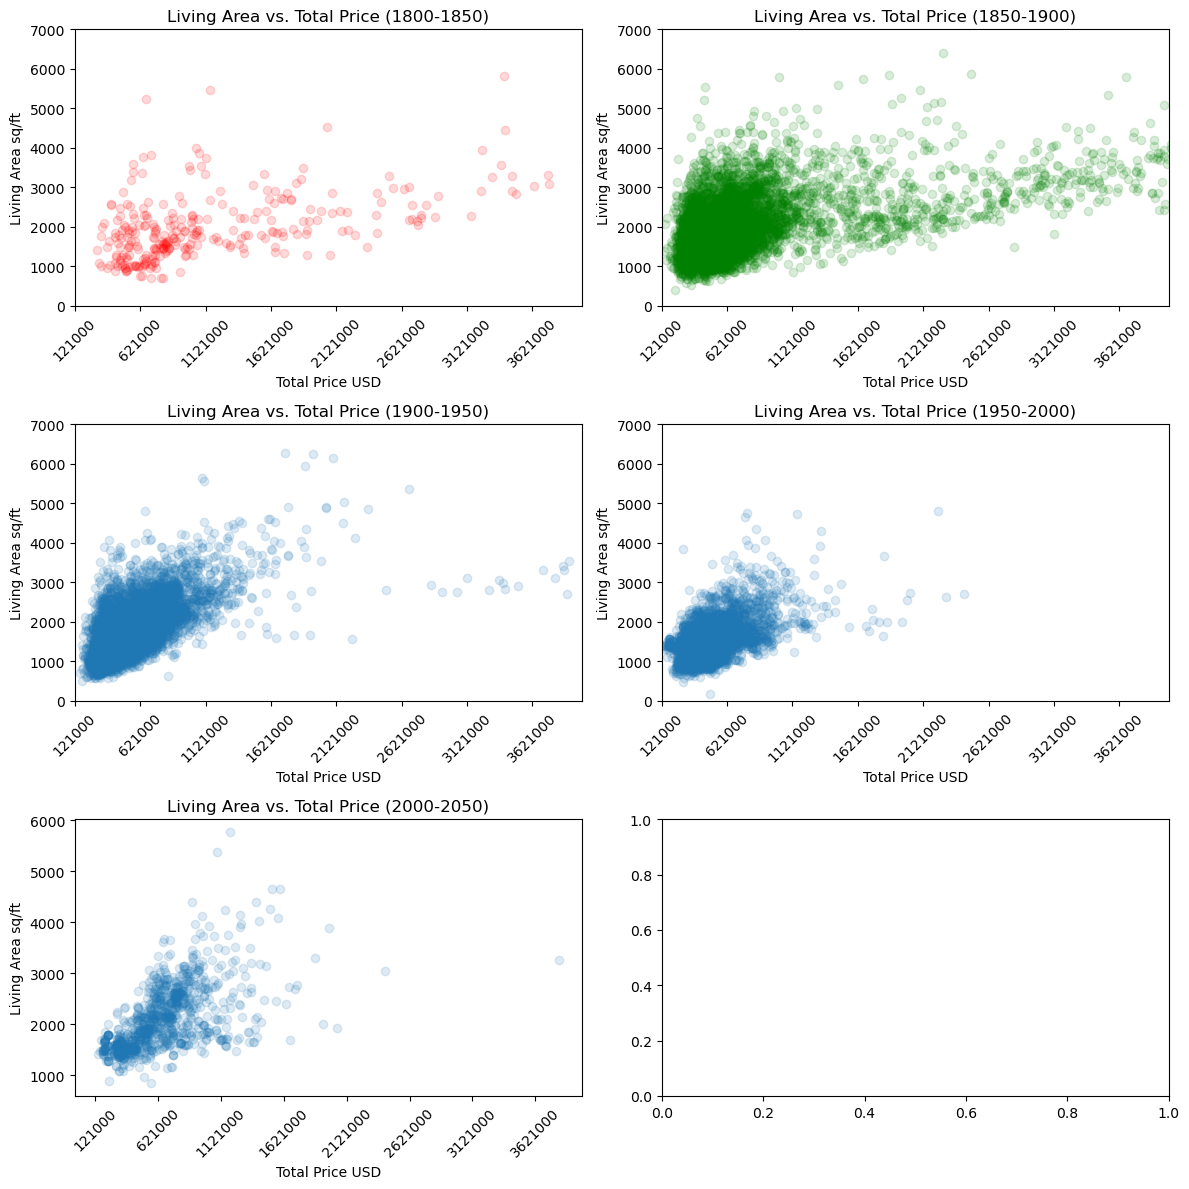

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,_)) = plt.subplots(ncols=2 , nrows=3, figsize=(12, 12))

# Set common x and y limits
x_lim = (121000, 4000000)
y_lim = (0, 7000)

# Scatter plot of houses built between 1800-1850
sns.regplot(x=df_1800_1850["AV_TOTAL"], y=df_1800_1850["LIVING_AREA"], scatter_kws={'alpha':0.15}, color="red", fit_reg=False, ax=ax1)
ax1.set_xlabel("Total Price USD")
ax1.set_ylabel("Living Area sq/ft")
ax1.set_xticks(np.arange(x_lim[0], x_lim[1], 500000))
ax1.set_xticklabels(np.arange(x_lim[0], x_lim[1], 500000), rotation=45)
ax1.set_ylim(y_lim)
ax1.set_xlim(x_lim)
ax1.set_title("Living Area vs. Total Price (1800-1850)")

# Scatter plot of houses built between 1850-1900
sns.regplot(x=df_1850_1900["AV_TOTAL"], y=df_1850_1900["LIVING_AREA"], scatter_kws={'alpha':0.15}, color="green", fit_reg=False, ax=ax2)
ax2.set_xlabel("Total Price USD")
ax2.set_ylabel("Living Area sq/ft")
ax2.set_xticks(np.arange(x_lim[0], x_lim[1], 500000))
ax2.set_xticklabels(np.arange(x_lim[0], x_lim[1], 500000), rotation=45)
ax2.set_ylim(y_lim)
ax2.set_xlim(x_lim)
ax2.set_title("Living Area vs. Total Price (1850-1900)")

# Scatter plot of houses built between 1900-1950
sns.regplot(x=df_1900_1950["AV_TOTAL"], y=df_1900_1950["LIVING_AREA"], scatter_kws={'alpha':0.15}, fit_reg=False, ax=ax3)
ax3.set_xlabel("Total Price USD")
ax3.set_ylabel("Living Area sq/ft")
ax3.set_xticks(np.arange(x_lim[0], x_lim[1], 500000))
ax3.set_xticklabels(np.arange(x_lim[0], x_lim[1], 500000), rotation=45)
ax3.set_ylim(y_lim)
ax3.set_xlim(x_lim)
ax3.set_title("Living Area vs. Total Price (1900-1950)")

# Scatter plot of houses built between 1950-2000
sns.regplot(x=df_1950_2000["AV_TOTAL"], y=df_1950_2000["LIVING_AREA"], scatter_kws={'alpha':0.15}, fit_reg=False, ax=ax4)
ax4.set_xlabel("Total Price USD")
ax4.set_ylabel("Living Area sq/ft")
ax4.set_xticks(np.arange(x_lim[0], x_lim[1], 500000))
ax4.set_xticklabels(np.arange(x_lim[0], x_lim[1], 500000), rotation=45)
ax4.set_ylim(y_lim)
ax4.set_xlim(x_lim)
ax4.set_title("Living Area vs. Total Price (1950-2000)")

# Scatter plot of houses built between 2000-2050
sns.regplot(x=df_2000_2050["AV_TOTAL"], y=df_2000_2050["LIVING_AREA"], scatter_kws={'alpha':0.15}, fit_reg=False, ax=ax5)
ax5.set_xlabel("Total Price USD")
ax5.set_ylabel("Living Area sq/ft")
ax5.set_xticks(np.arange(x_lim[0], x_lim[1], 500000))
ax5.set_xticklabels(np.arange(x_lim[0], x_lim[1], 500000), rotation=45)
ax5.set_title("Living Area vs. Total Price (2000-2050)")

# Show the plot
plt.tight_layout()
plt.show()
